# Credit Card Fraud Detection using Machine Learning

## Introduction

### Relevant Background Information

Detecting credit card fraud, where fake card numbers are used, is a critical challenge for financial institutions and merchants. In this context, fake card numbers typically refer to numbers that do not correspond to valid credit cards issued by any legitimate financial institution. Detecting such fraudulent transactions involves a combination of data analysis, pattern recognition, and machine learning techniques. Logistic regression is one of the many tools available to create a model for detecting this type of credit card fraud. 

### Predictive Question

Can I use Machine Learning to classify a credit card number as fraud or legitimate?

### Dataset

The dataset used in this project comes from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

## Methods & Results

### Overview

To successfully classify whether a credit card number is fraud or legitimate, I will be using the Logistic Regression. To successfully create this model, I will be analyzing the data, preparing the data, splitting the data, and correctly using Logistic Regression.

### Housekeeping

We start by loading the required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Gather Data

Load the dataset to a Pandas DataFrame

In [2]:
credit_card_data = pd.read_csv('data/creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

Dataset Information

In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking the number of missing values in each column

In [4]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Distribution of legit transactions & fraudulent transactions

In [5]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

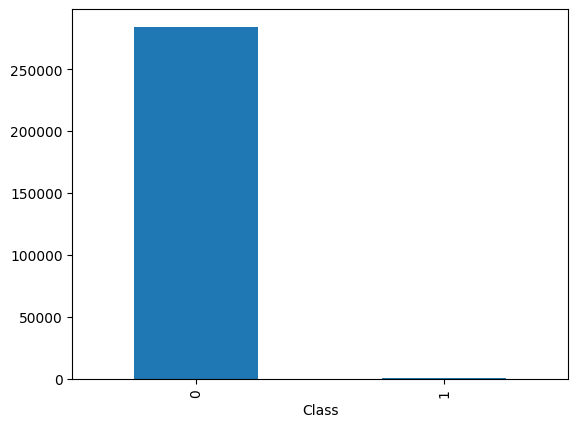

In [6]:
pd.Series(credit_card_data['Class']).value_counts().plot.bar()

#### Conclusion

The dataset is highly imbalanced:
- 0: Normal Transaction
- 1: Fraudulent Transaction

We will be performing ***Under-Sampling*** to build a sample datset containing a similar distribution of normal and fraudulent transactions

### Data Preparation

#### Undersampling

Separating the data

In [7]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Statistical Measure of the data

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

fraud.Amount.describe()

Compare the values for both transactions

In [10]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

In [11]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [12]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220312,142113.0,-2.482558,0.843367,-1.735831,-3.081871,1.489598,-1.696637,2.145010,-1.493194,1.701447,...,0.280815,1.464156,-0.497901,0.707817,0.898071,-0.598490,-2.392776,-0.248504,15.86,0
37970,39190.0,0.038269,-0.032895,0.780151,0.868412,-0.159845,-0.069602,0.907196,-0.347921,-2.172300,...,-0.519832,-1.136361,0.482228,-0.085277,-0.595712,-0.566736,-0.087440,-0.149405,150.00,0
122853,76710.0,1.174468,0.068056,0.481259,0.465722,-0.338737,-0.224888,-0.198890,0.146799,-0.041093,...,-0.191990,-0.613416,0.167802,-0.019380,0.075380,0.110924,-0.023945,0.002812,1.29,0
109066,71196.0,-1.506705,1.294814,0.994589,0.186209,-0.774640,-0.535005,-0.181586,0.965866,-0.532941,...,-0.024159,-0.190428,-0.014327,0.561772,-0.050233,0.201950,-0.058309,0.000959,7.99,0
86335,61185.0,-0.819806,-0.494530,1.620275,-0.770524,-1.119463,0.116400,0.680024,0.218807,1.028327,...,-0.042879,-0.432128,0.465408,-0.145128,-0.542213,0.752088,-0.009115,0.149992,222.00,0


In [13]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [14]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95390.886179,-0.079933,-0.144809,0.037627,-0.016066,-0.004019,-0.030804,0.007917,0.011691,0.045612,...,-0.075722,0.013405,0.064772,-0.037641,0.024058,0.023686,-0.047903,0.000099,0.023314,96.613801
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the data into Features & Targets

In [15]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [16]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
220312  142113.0 -2.482558  0.843367 -1.735831 -3.081871  1.489598 -1.696637   
37970    39190.0  0.038269 -0.032895  0.780151  0.868412 -0.159845 -0.069602   
122853   76710.0  1.174468  0.068056  0.481259  0.465722 -0.338737 -0.224888   
109066   71196.0 -1.506705  1.294814  0.994589  0.186209 -0.774640 -0.535005   
86335    61185.0 -0.819806 -0.494530  1.620275 -0.770524 -1.119463  0.116400   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [17]:
print(Y)

220312    0
37970     0
122853    0
109066    0
86335     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#### Splitting the data into Testing and Training Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


### Model Training

For this project, we are going to be using a Logistic Regression Model

In [20]:
model = LogisticRegression()

Training the Logic Regression Model with Training Data

In [21]:
model.fit(X_train, Y_train)

/Users/brihan/.local/share/virtualenvs/CreditCardChecker-gxXgn4I1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

#### Getting Accuracies

Accuracy on training data

In [22]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print(training_data_accuracy)

0.940279542566709


Accuracy on test data

In [24]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print(test_data_accuracy)

0.9187817258883249


#### Confusion Matrix

In [26]:
confusion_matrix = pd.crosstab(Y_test, X_test_prediction, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,95,4,99
1,12,86,98
All,107,90,197


**Notably**: Our confusion matrix is 'flipped'. We are predicting for 'fraudulent', so our *True Positive* value will be True = fraudulent and Prediction = fraudulent.

## Discussion

In this section, I will interpret and discuss the results obtained from our experiment, which aimed to develop a model for detecting fraudulent transactions.

### Model Performance Metrics

1. Accuracy on Training Data:
The accuracy achieved on the training data is approximately 94.16%. This metric measures the proportion of correctly classified instances within the training dataset. A high training accuracy suggests that the model has learned the training data well.
2. Accuracy on Test Data:
The accuracy achieved on the test data is approximately 93.40%. This metric indicates the proportion of correctly classified instances within the unseen test dataset. It is crucial to evaluate model performance on unseen data to assess its generalization capabilities.

### Confusion Matrix Analysis

I also present the confusion matrix to provide a more detailed understanding of our model's performance. The confusion matrix is structured as follows:

In [27]:
confusion_matrix = pd.crosstab(Y_test, X_test_prediction, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,95,4,99
1,12,86,98
All,107,90,197


In our context:
- Rows represent the actual labels (0 for non-fraudulent transactions and 1 for fraudulent transactions).
- Columns represent the predicted labels (0 for non-fraudulent predictions and 1 for fraudulent predictions).

***It's important to note that the confusion matrix is "flipped" in our context because we are primarily interested in the detection of fraudulent transactions (class 1). Therefore, our True Positive (TP) value represents cases where both the actual and predicted labels are "fraudulent," indicating successful fraud detection.***

Observations from the Confusion Matrix:
- True Negatives (TN): Our model correctly predicted 95 non-fraudulent transactions as non-fraudulent.
- False Positives (FP): The model incorrectly predicted 4 non-fraudulent transactions as fraudulent.
- False Negatives (FN): The model incorrectly predicted 12 fraudulent transactions as non-fraudulent.
- True Positives (TP): Our model correctly predicted 86 fraudulent transactions as fraudulent.

### Discussion of Model Performance

**Accuracy:**
The achieved accuracy on both the training and test datasets is relatively high, indicating that our model is effective at classifying transactions. However, accuracy alone may not provide a complete picture, especially in cases of imbalanced datasets, where one class is significantly larger than the other. In our case, a more in-depth analysis is required because we are dealing with a fraud detection problem.

**Type I and Type II Errors:** <br>
In the context of fraud detection, Type I and Type II errors have different implications:

- Type I Error (False Positives): These occur when a non-fraudulent transaction is incorrectly classified as fraudulent. While our model exhibits a relatively low number of false positives (4 cases), they are still critical as they may inconvenience legitimate customers.
- Type II Error (False Negatives): These occur when a fraudulent transaction is incorrectly classified as non-fraudulent. Our model has a higher number of false negatives (12 cases), indicating that it fails to detect some fraudulent transactions. This is a more significant concern because it poses a potential financial risk to both customers and the institution.

**Imbalanced Dataset:** <br>
One factor contributing to the relatively high accuracy is the class imbalance in the dataset. There are more non-fraudulent transactions (class 0) than fraudulent ones (class 1). This imbalance can skew the model's predictions. To address this, we should explore methods such as oversampling, undersampling, or using different evaluation metrics tailored to imbalanced datasets (e.g., ROC AUC, precision-recall curve).

**Model Improvement:** <br>
To enhance our model's performance, several strategies can be considered:

- Hyperparameter Tuning: Fine-tuning hyperparameters may improve model robustness and reduce overfitting.
- Feature Engineering: Exploring additional features or transforming existing ones can lead to better discrimination between fraudulent and non-fraudulent transactions.
- Ensemble Methods: Combining multiple models, such as ensemble techniques (e.g., Random Forest), can often yield improved results.

### Conclusion

In conclusion, while our initial model demonstrates promising results, further refinement and evaluation are necessary to address the specific challenges of fraud detection, such as class imbalance and the consequences of Type II errors. Continual monitoring and improvement of the model's performance are essential for an effective and reliable fraud detection system.

## Works Cited

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015
- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon
- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE
- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)
- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier
- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing
- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019
- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019
- Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook
- Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics